In [2]:
import pandas as pd
import numpy as np
import json
from datetime import datetime
import os
import seaborn as sns
import statistics
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from utils.generateFinalRow import generateFinalRows
# from utils.generateRelativeRow import getRelativeRows


ratioKeys = ['psRatio', 'peRatio', 'priceToBook', 'evToEbitda', 'evToEbit', 'priceToFreeCashFlow', 'evToSales', 'evToGrossProfit', 'priceToGrossProfit']
yKeys = ['yAdjustedPriceSpinoffExcl1Year', 'yAdjustedPrice1Year', 'yPrice1Year']
y2Keys = ['yAdjustedPriceSpinoffExcl2Year', 'yAdjustedPrice2Year', 'yPrice2Year']
numericalKeys = ratioKeys + yKeys + y2Keys

In [ ]:
fileNames = os.listdir('../data/results-no-alpha')

allCompanies = []
for fileName in fileNames:
    with open('../data/results-no-alpha/' + fileName) as json_data:
        data = json.load(json_data)
        allCompanies.append(data)

spyData = {}

for year in range(2015, 2026):
    for month in range(1,13):
        currentAllData = pd.DataFrame()
        i = 0
        for company in allCompanies:
            yearData = company.get(year, 0)
            if yearData:
                monthData = yearData.get(month, 0)
                if monthData:
                    currCompany = pd.DataFrame({
                        'price': monthData['price'],
                        'adjustedTotalPrice': monthData['adjustedTotalPrice'],
                        'adjustedTotalPriceSpinoffExcl': monthData['adjustedTotalPriceSpinoffExcl']
                    }, index=i)
                    i += 1
                    currentAllData = pd.concat([currentAllData, currCompany])
        stats = {}
        for key in ['price', 'adjustedTotalPrice', 'adjustedTotalPriceSpinoffExcl']:
            stats[key] = {
                'mean': currentAllData.loc[:, key].mean(),
                'median': currentAllData.loc[:, key].median()
            }
        spyData[str(month) + '-' + str(year)] = stats


In [5]:
if not os.path.isfile('../data/temp.csv'):
    # fileNames = os.listdir('../data/results')
    # TEST!!!! TODO:
    path = '../data/results-no-alpha/'
    fileNames = os.listdir(path)
    companyDf = pd.DataFrame()
    i = 0
    for fileName in fileNames:
        with open(path + fileName) as json_data:
            data = json.load(json_data)
            companyDf, i = generateFinalRows(data, ratioKeys, fileName, i, companyDf)
    companyDf.to_csv('../data/temp.csv', sep='\t')

df = pd.read_csv('../data/temp.csv', sep='\t')


F:\programowanie\studia\magisterka\sec_scrapper2\finchat\utils\generateFinalRow.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, toAdd])
F:\programowanie\studia\magisterka\sec_scrapper2\finchat\utils\generateFinalRow.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, toAdd])
F:\programowanie\studia\magisterka\sec_scrapper2\finchat\utils\generateFinalRow.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is depr

In [35]:
from utils.generateRelativeRow import getRelativeRows
if not os.path.isfile('../data/temp-relative.csv'):
    fileNames = os.listdir('../data/results')
    companyDf = pd.DataFrame()
    i = 0
    for fileName in fileNames: 
        with open('../data/results/' + fileName) as json_data:
            data = json.load(json_data)
            companyDf, i = getRelativeRows(data, ratioKeys, fileName, i, companyDf)
    companyDf.to_csv('../data/temp-relative.csv', sep='\t')
    
relativeDf = pd.read_csv('../data/temp-relative.csv', sep='\t')


In [36]:
# TODO: DROP evToSales evToGrossProfit and calculate other columns again. More data will be available

In [9]:
# TODO: normalize ratios. Could have better results. 
dfNorm = pd.DataFrame(normalize(df[ratioKeys]), columns=ratioKeys)
dfY = df[yKeys + y2Keys]
dfNorm = dfNorm.join(dfY)

In [37]:
dfRelativeNorm = pd.DataFrame(normalize(relativeDf[ratioKeys]), columns=ratioKeys)
dfY = df[yKeys + y2Keys]
dfRelativeNorm = dfRelativeNorm.join(dfY)

In [46]:
# dfNorm
# relativeDf
dfRelativeNorm

,psRatio,peRatio,priceToBook,evToEbitda,evToEbit,priceToFreeCashFlow,evToSales,evToGrossProfit,priceToGrossProfit,yAdjustedPriceSpinoffExcl1Year,yAdjustedPrice1Year,yPrice1Year,yAdjustedPriceSpinoffExcl2Year,yAdjustedPrice2Year,yPrice2Year
0,0.364981,0.143780,0.353921,0.364981,0.265441,0.342861,0.364981,0.364981,0.364981,-0.015081,-0.015081,-0.025846,0.295489,0.295489,0.273197
1,0.348710,0.348710,0.348710,0.348710,0.242160,0.300278,0.348710,0.348710,0.348710,-0.086332,-0.086332,-0.096253,0.239065,0.239065,0.218735
2,0.347985,0.392887,0.392887,0.336760,0.157155,0.303084,0.336760,0.336760,0.336760,-0.018394,-0.018394,-0.026093,0.303006,0.303006,0.285335
3,0.341311,0.414449,0.414449,0.329121,0.073138,0.304742,0.341311,0.316932,0.341311,0.007376,0.007376,-0.002869,0.354366,0.354366,0.333971
4,0.351058,0.399479,0.411585,0.338952,0.108949,0.290531,0.338952,0.326847,0.338952,0.132782,0.132782,0.122923,0.504232,0.504232,0.484115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27501,0.082619,0.041310,0.000000,0.041310,0.041310,0.991431,0.041310,0.041310,0.041310,-0.046408,-0.046408,-0.046408,-0.049269,-0.049269,-0.049269
27502,0.035578,0.035578,0.000000,0.035578,0.000000,0.996195,0.035578,0.035578,0.035578,-0.222577,-0.222577,-0.222577,0.015625,0.015625,0.015625
27503,0.065724,0.065724,0.032862,0.065724,0.032862,0.985861,0.065724,0.065724,0.065724,-0.146894,-0.146894,-0.146894,-0.007654,-0.007654,-0.007654
27504,0.088235,0.088235,0.058824,0.088235,0.088235,0.970588,0.088235,0.088235,0.088235,0.194024,0.194024,0.194024,0.194393,0.194393,0.194393


In [7]:
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})

Text(0.5, 1.0, 'Not normalized RELATIVE values')

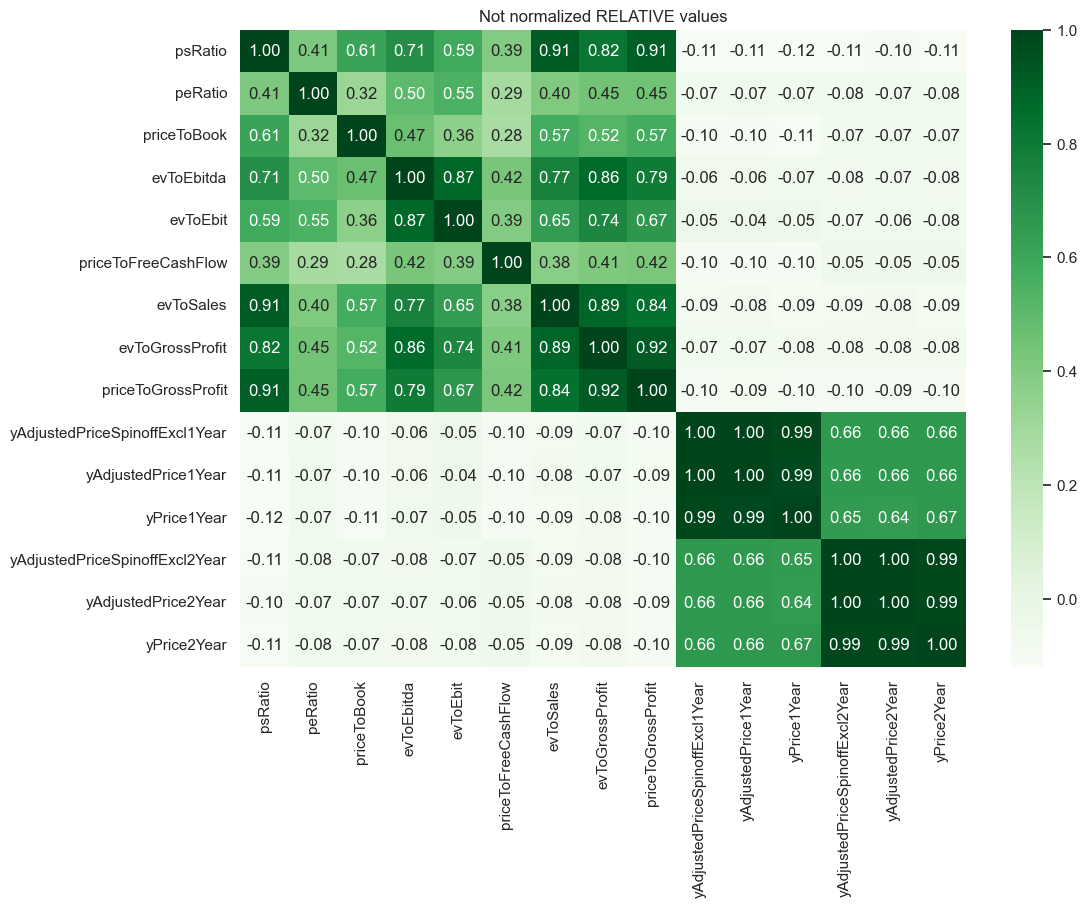

In [40]:
matrix = relativeDf[numericalKeys].corr()
sns.heatmap(matrix, cmap="Greens", annot=True, fmt=".2f", ).set_title("Not normalized RELATIVE values")

Text(0.5, 1.0, 'Normalized RELATIVE values')

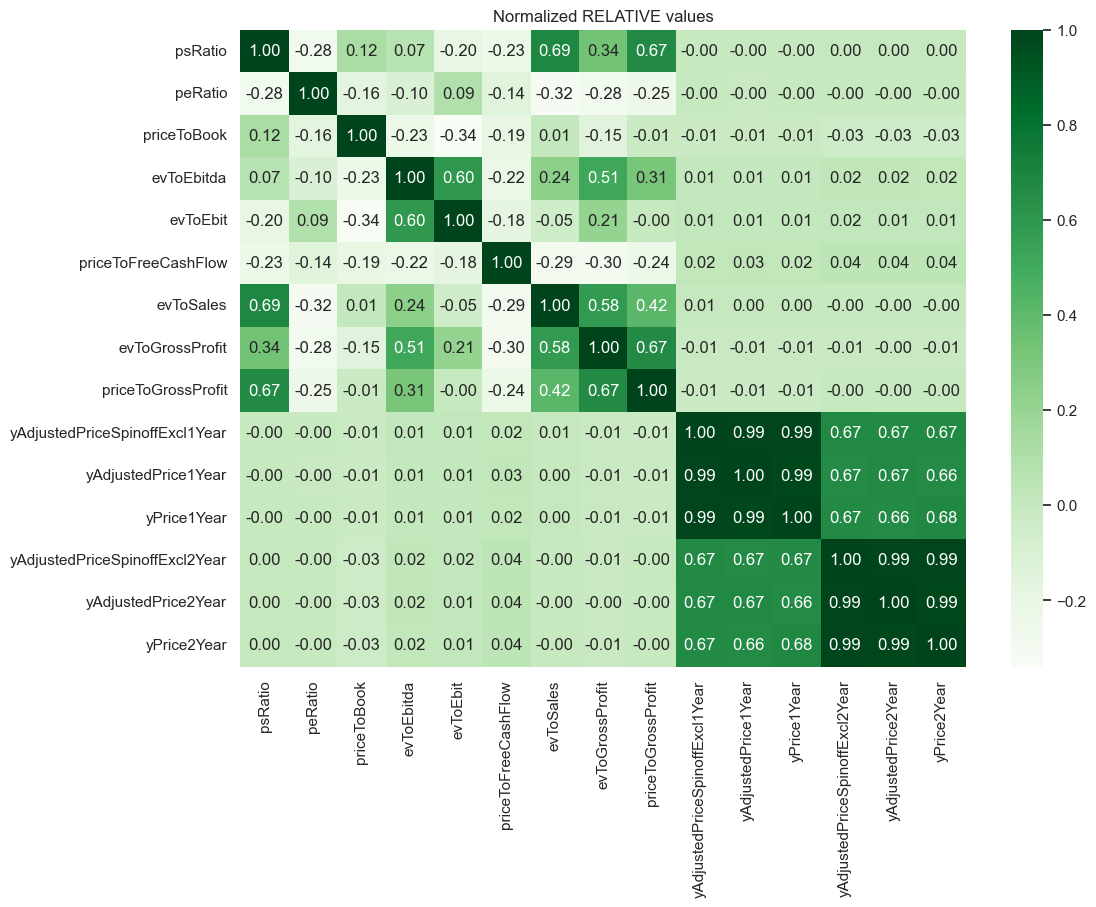

In [41]:
matrix = dfRelativeNorm[numericalKeys].corr()
sns.heatmap(matrix, cmap="Greens", annot=True, fmt=".2f", ).set_title("Normalized RELATIVE values")

Text(0.5, 1.0, 'Not normalized absolute values')

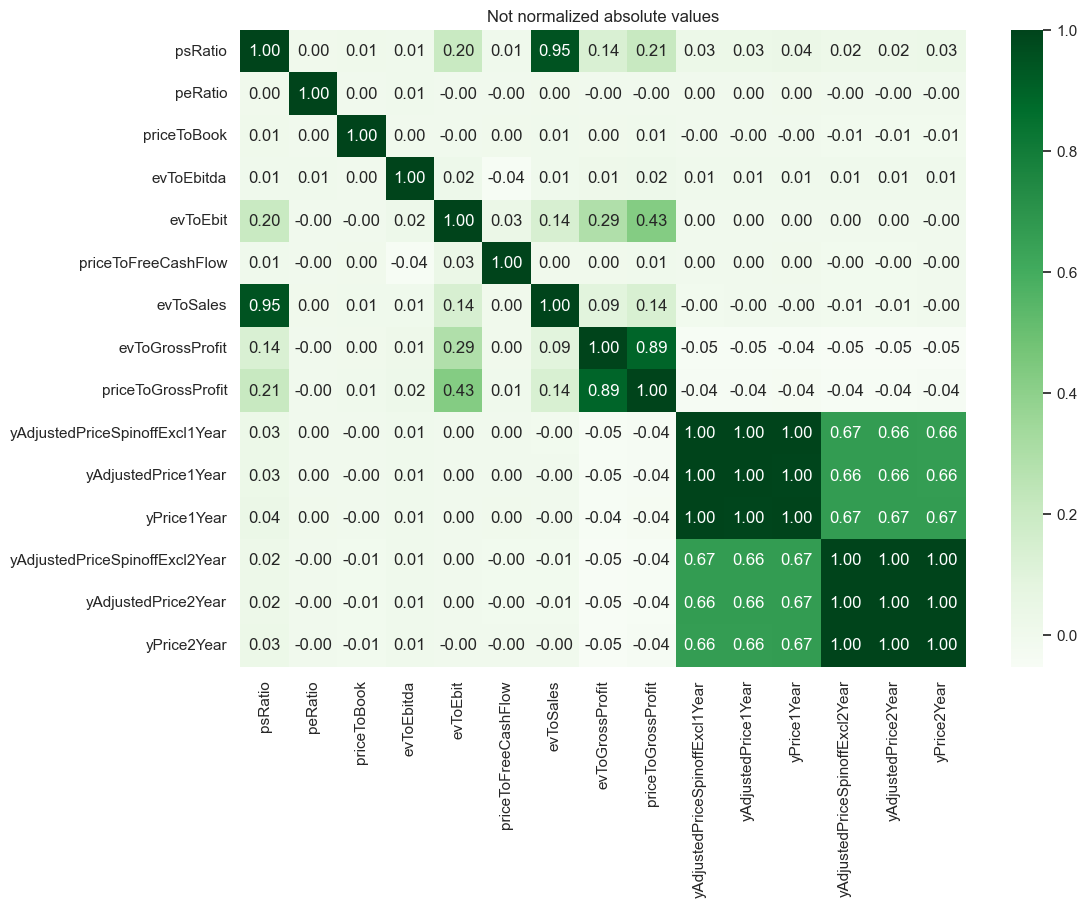

In [8]:
matrix = df[numericalKeys].corr()
sns.heatmap(matrix, cmap="Greens", annot=True, fmt=".2f", ).set_title("Not normalized absolute values")

Text(0.5, 1.0, 'Normalized absolute values')

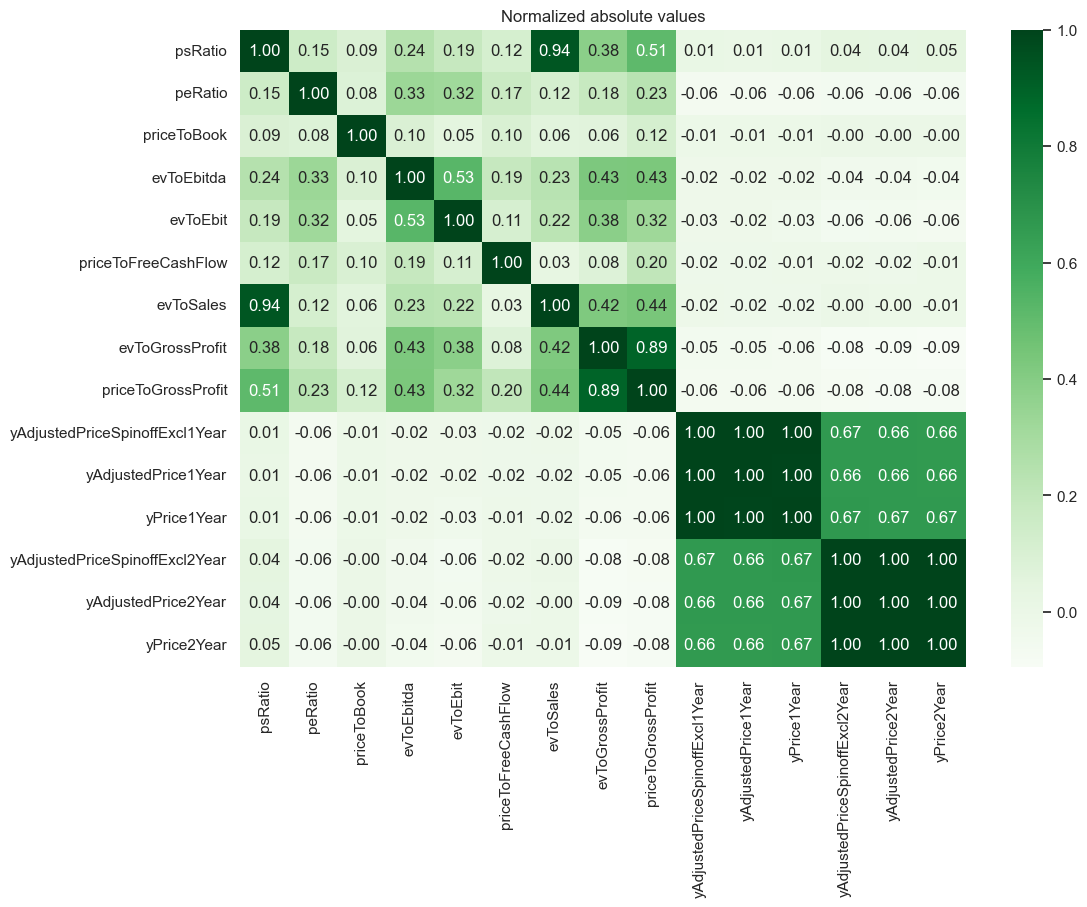

In [10]:
matrix = dfNorm.corr()
sns.heatmap(matrix, cmap="Greens", annot=True, fmt=".2f", ).set_title("Normalized absolute values")

In [45]:

# for i, key in enumerate(keys):
#     med = statistics.median(df[key])
#     mean = statistics.mean(df[key])
#     # print("key: {}, median: {}, mean: {}".format(key, med, round(mean, 2)))
#     
#     # TODO: outliers from returns too
#     q_low = df[key].quantile(0.01)
#     q_hi  = df[key].quantile(0.99)
#     
#     df_filtered = df[(df[key] < q_hi) & (df[key] > q_low)]
    # sns.scatterplot(data=df_filtered, x=key, y='yAdjustedTotalPrice')
    # plt.show()
